In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from general_graph_utils import *

# Plot features

In [17]:
# plot formatting
plt.rc("text", usetex=False) # renders LaTeX more quickly
plt.rc("font", family = "serif",size=14) # font specifications
plt.rc("figure",figsize=(14,12)) # figure size
%config InlineBackend.figure_format = 'retina' # retina-display quality

# Quick test of pipeline

In [36]:
G, G_ud = random_graph(n=5)

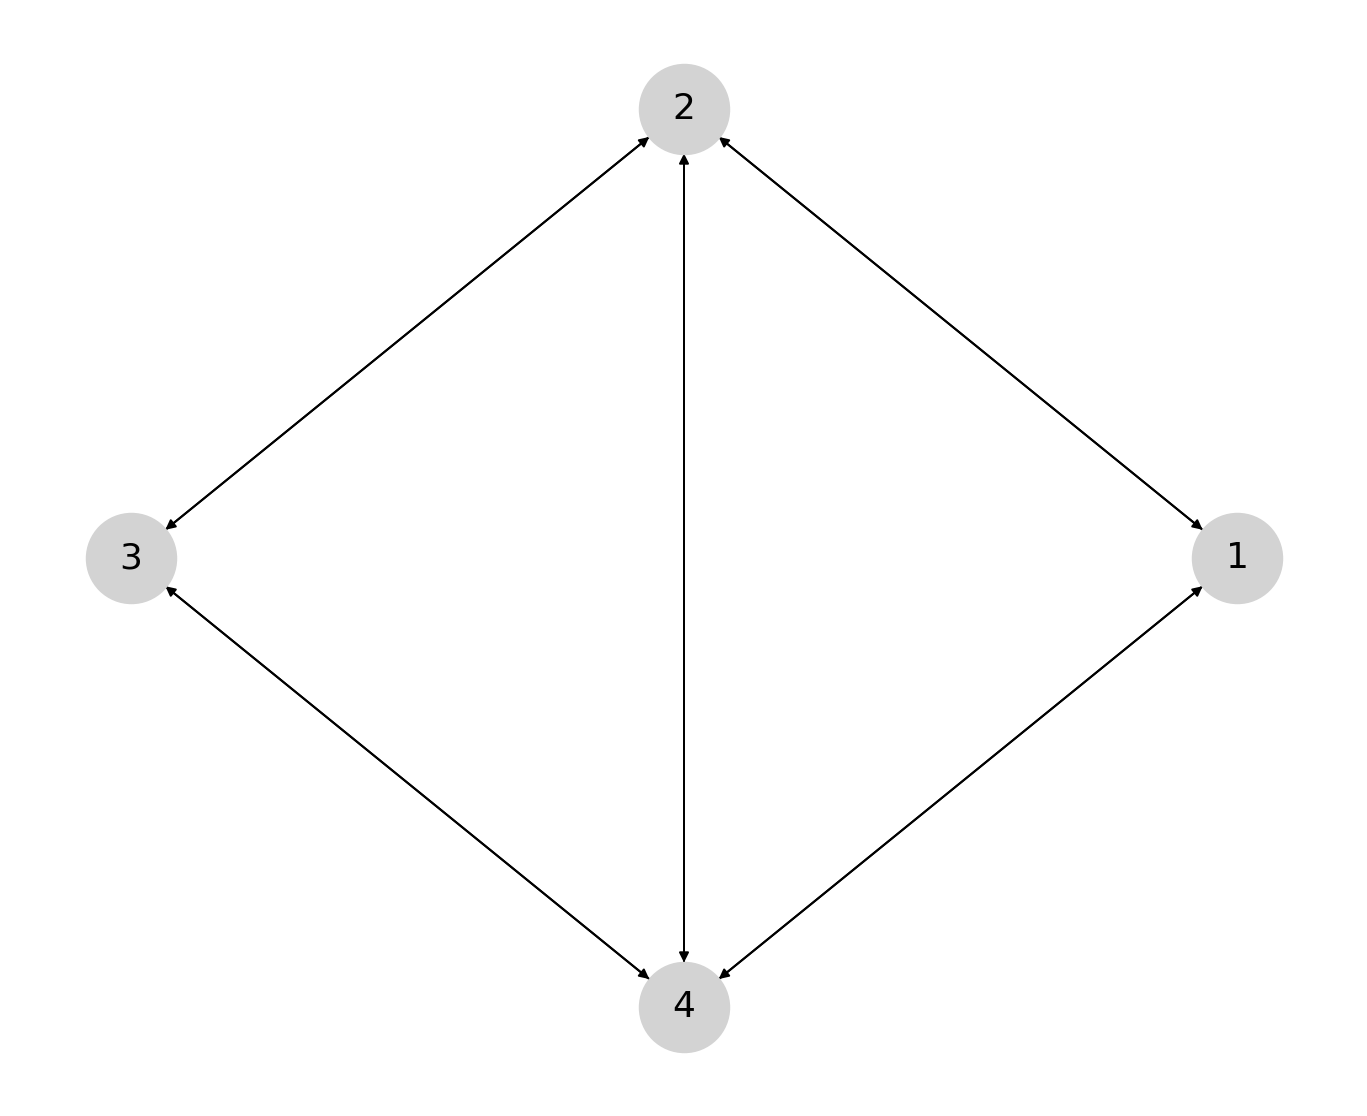

In [37]:
fig, ax = plt.subplots(figsize = (12, 10))
nx.draw(G, pos=nx.circular_layout(G), with_labels=True, node_size=2000, node_color = 'lightgray', font_size=18, font_color='black', font_family='sans-serif')

In [38]:
node_list = get_nodes(G)
num_nodes = len(node_list)
print(node_list)

[1 2 3 4]


In [39]:
edge_list = get_edges(G)
print(edge_list)

[[1 4]
 [1 2]
 [2 4]
 [2 3]
 [2 1]
 [3 4]
 [3 2]
 [4 3]
 [4 2]
 [4 1]]


In [40]:
cycle_list = get_cycle_nodes(G_ud)
num_cycles = len(cycle_list)
print(cycle_list)

[[4, 2, 1], [4, 3, 2]]


In [41]:
label_dict, label_list = get_labels(G)
print(label_dict)
print(label_list)

{(1, 4): 0.0019, (1, 2): 0.01469, (2, 4): 1.34331, (2, 3): 75.59029, (2, 1): 1.86453, (3, 4): 0.13553, (3, 2): 20.77807, (4, 3): 0.17574, (4, 2): 279.87611, (4, 1): 12.72474}
[1.9000000e-03 1.4690000e-02 1.3433100e+00 7.5590290e+01 1.8645300e+00
 1.3553000e-01 2.0778070e+01 1.7574000e-01 2.7987611e+02 1.2724740e+01]


In [42]:
cycle_edges_forward,cycle_edges_backward,cycle_labels_forward,cycle_labels_backward = get_cycle_labels_edges(cycle_list,label_dict)

In [43]:
cycle_edges_backward

[[(2, 4), (1, 2), (4, 1)], [(3, 4), (2, 3), (4, 2)]]

In [44]:
cycle_edges_forward

[[(4, 2), (2, 1), (1, 4)], [(4, 3), (3, 2), (2, 4)]]

In [12]:
cycle_labels_forward, edge_tracker = initial_equilibrium_parameters(cycle_list,cycle_edges_forward,cycle_labels_forward,cycle_labels_backward)

In [13]:
cycle_labels_forward

[[12.409232262965887, 241.81407000000004, 137.85426999999999, 17.91899],
 [5.9195321412492845, 241.81407, 0.06399],
 [0.040670940332658424, 32.42898000000001, 137.85427, 17.91899]]

In [45]:
products_f, products_b = calculate_cycle_products(cycle_labels_forward,cycle_labels_backward)
total_affinities = calculate_affinities(products_f, products_b, cycle_list)
print(total_affinities)

[ 1.3733581  -6.37082744]


In [15]:
label_dict, label_list = reformat_labels(cycle_list, cycle_labels_forward, edge_tracker, label_dict, label_list)

In [47]:
np.log(.25)

-1.3862943611198906

# Making new functions